# Experiment with ResNet architecture

In [1]:
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt

import tensorflow as tf
#print(tf.__version__)
from tensorflow import keras
from keras.applications import ResNet50
from keras.callbacks import EarlyStopping
from keras.preprocessing import image
from keras.applications.resnet import preprocess_input, decode_predictions
from keras import Input
from keras.layers import Flatten, Dense, Dropout
from keras.models import Sequential

In [2]:
num_classes = 9

In [3]:
print("Loading data...")
training_file = './Data/train.p'

sign_names = pd.read_csv("./Data/signname.csv").values[:, 1]

with open(training_file, mode='rb') as f:
    train = pickle.load(f)

Loading data...


In [3]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [4]:
images_train = []
labels_train = []

# Incrementing for loop
for i in range(0, len(train['labels']), 1):
    current_label = train['labels'][i]

    # Add if speed limit sign
    if current_label <= 8:
        labels_train.append(current_label)
        images_train.append(train['features'][i])


images_train = np.array(images_train)
labels_train = np.array(labels_train)

In [5]:
def make_plt(y_train, x_label, y_label, title):
    plt.figure(0, figsize=(20, 5))
    unique_train, counts_train = np.unique(y_train, return_counts=True)
    plt.bar(unique_train, counts_train)

    plt.title(title, fontsize=22)
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)
    plt.tick_params(labelsize=16)
    plt.grid(linestyle=':')
    return plt

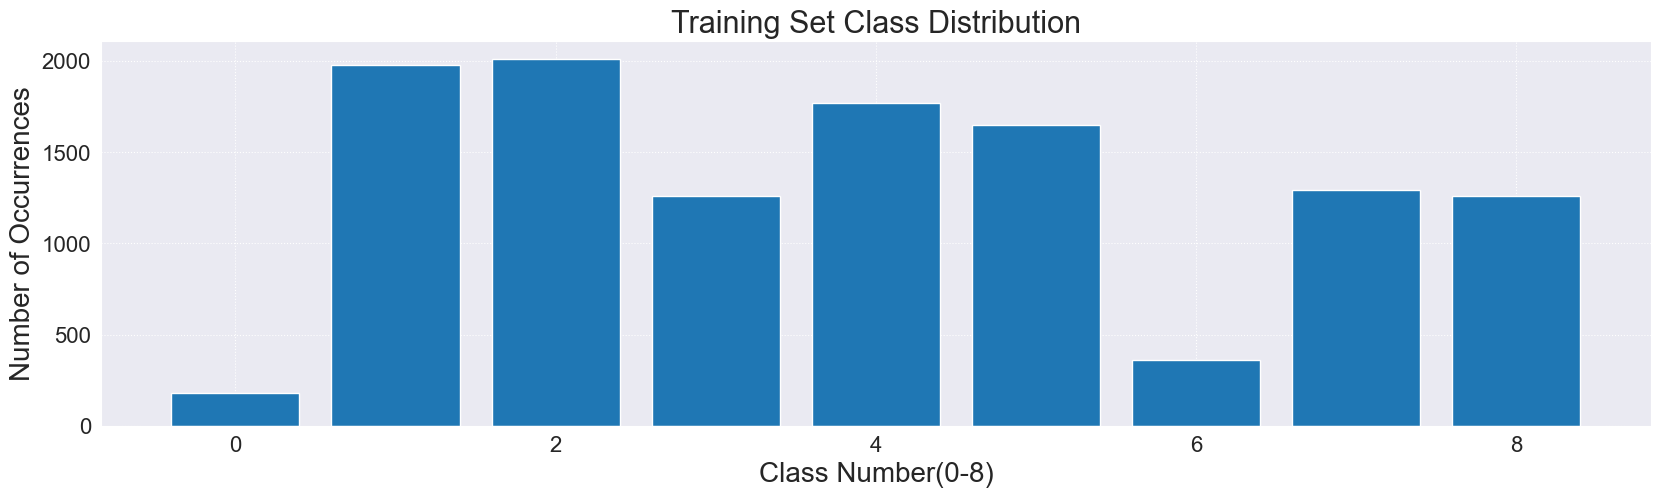

In [6]:
plt = make_plt(labels_train, 'Class Number(0-8)', 'Number of Occurrences', 'Training Set Class Distribution')
plt.show()

In [5]:
def get_data(pickle_filename):
    with open(pickle_filename, mode='rb') as f:
        data = pickle.load(f)


    images_train = []
    labels_train = []

    # Incrementing for loop
    for i in range(0, len(data['labels']), 1):
        current_label = data['labels'][i]

        # Add if speed limit sign
        if current_label <= 8:
            labels_train.append(current_label)
            images_train.append(data['features'][i])


    return np.array(images_train), np.array(labels_train)

In [6]:
images_valid, labels_valid = get_data('./Data/valid.p')

In [7]:
images_test, labels_test = get_data('./Data/test.p')

In [32]:
images_test.shape

(4320, 32, 32, 3)

Starting off with the common version ResNet50. 50 layers. Can capture complex features without being too deep. Balance between computational efficiency and model complexity. If our dataset is deemed too small after evaluation of this model, a lighter version will need to be used.

In [12]:
# Image dimensions and channels
height = 32  # example height
width = 32   # example width
channels = 3  # RGB channels

#input_tensor = Input(shape=(32, 32, 3), batch_size=None)
#input_tensor = Input(shape=(32, 32, 3), batch_size=batch_size)
input_tensor = Input(shape=(height, width, channels))

#model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor, input_shape=(height, width, channels))
#model = ResNet50(weights='imagenet', include_top=True, input_tensor=input_tensor, classes=num_classes)
model = ResNet50(weights='imagenet', include_top=True, input_tensor=input_tensor)

# Freeze the pre-trained layers
for layer in model.layers:
    layer.trainable = False

Let's first examine how the ResNet model performs without fine-tuning.

In [22]:
images_test

[array([[[59, 70, 61],
         [87, 80, 63],
         [92, 81, 63],
         ...,
         [77, 64, 67],
         [71, 65, 67],
         [74, 69, 68]],
 
        [[59, 68, 58],
         [94, 83, 65],
         [95, 80, 62],
         ...,
         [77, 64, 66],
         [92, 69, 70],
         [85, 68, 68]],
 
        [[56, 68, 58],
         [90, 84, 67],
         [95, 82, 64],
         ...,
         [72, 65, 66],
         [80, 67, 69],
         [79, 69, 70]],
 
        ...,
 
        [[48, 47, 43],
         [79, 68, 57],
         [80, 66, 56],
         ...,
         [68, 63, 63],
         [78, 65, 65],
         [76, 66, 68]],
 
        [[49, 46, 45],
         [78, 66, 61],
         [78, 65, 58],
         ...,
         [60, 60, 61],
         [68, 65, 65],
         [73, 67, 67]],
 
        [[51, 45, 45],
         [78, 66, 61],
         [79, 66, 58],
         ...,
         [62, 59, 62],
         [73, 67, 70],
         [75, 70, 70]]], dtype=uint8),
 array([[[14, 14, 17],
         [15, 13, 1

In [27]:
images_test[0].shape

(32, 32, 3)

In [33]:
images_test.shape

(4320, 32, 32, 3)

In [9]:
model.predict(images_test[0])

ValueError: in user code:

    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "C:\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Python310\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "resnet50" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(32, 32, 3)


In [13]:
model.predict(images_test)

135/135 [==============================] - 13s 90ms/step


array([[2.1094816e-18, 1.9452313e-16, 5.3313062e-19, ..., 1.2446013e-20,
        2.0703363e-20, 1.2845997e-19],
       [1.8429239e-15, 1.5573107e-13, 4.8778313e-14, ..., 2.0059982e-17,
        3.5455026e-17, 2.8069830e-16],
       [3.8246205e-26, 6.0501739e-22, 2.8867634e-20, ..., 1.1087255e-28,
        2.3100698e-27, 4.1893111e-16],
       ...,
       [7.2361631e-31, 2.8933039e-26, 4.1572636e-32, ..., 2.3618595e-34,
        5.3369800e-37, 6.5047132e-32],
       [1.8320801e-19, 4.7663967e-19, 8.8628545e-17, ..., 2.8935915e-19,
        1.7933558e-21, 1.6427906e-21],
       [2.1202123e-08, 5.9236540e-04, 8.1550142e-11, ..., 9.1841085e-10,
        1.5213172e-06, 1.5216806e-07]], dtype=float32)

In [14]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [15]:
predictions = model.predict(images_test)

135/135 [==============================] - 12s 89ms/step


In [16]:
predictions

array([[2.1094816e-18, 1.9452313e-16, 5.3313062e-19, ..., 1.2446013e-20,
        2.0703363e-20, 1.2845997e-19],
       [1.8429239e-15, 1.5573107e-13, 4.8778313e-14, ..., 2.0059982e-17,
        3.5455026e-17, 2.8069830e-16],
       [3.8246205e-26, 6.0501739e-22, 2.8867634e-20, ..., 1.1087255e-28,
        2.3100698e-27, 4.1893111e-16],
       ...,
       [7.2361631e-31, 2.8933039e-26, 4.1572636e-32, ..., 2.3618595e-34,
        5.3369800e-37, 6.5047132e-32],
       [1.8320801e-19, 4.7663967e-19, 8.8628545e-17, ..., 2.8935915e-19,
        1.7933558e-21, 1.6427906e-21],
       [2.1202123e-08, 5.9236540e-04, 8.1550142e-11, ..., 9.1841085e-10,
        1.5213172e-06, 1.5216806e-07]], dtype=float32)

In [17]:
predictions.shape

(4320, 1000)

In [18]:
decoded_predictions = decode_predictions(predictions)

35363/35363 [==============================] - 0s 0us/step


In [19]:
decoded_predictions

[[('n03584254', 'iPod', 0.6193853),
  ('n04456115', 'torch', 0.27449116),
  ('n06874185', 'traffic_light', 0.100524604),
  ('n04074963', 'remote_control', 0.0041832677),
  ('n04009552', 'projector', 0.0012563369)],
 [('n03492542', 'hard_disc', 0.7061602),
  ('n04074963', 'remote_control', 0.2748798),
  ('n03691459', 'loudspeaker', 0.0065817786),
  ('n09229709', 'bubble', 0.00502652),
  ('n04505470', 'typewriter_keyboard', 0.002250174)],
 [('n04254680', 'soccer_ball', 0.99999976),
  ('n03445777', 'golf_ball', 2.0066075e-07),
  ('n03840681', 'ocarina', 1.250016e-10),
  ('n03720891', 'maraca', 5.5649593e-11),
  ('n04540053', 'volleyball', 8.23367e-12)],
 [('n04243546', 'slot', 0.99771523),
  ('n03089624', 'confectionery', 0.0018962481),
  ('n03733131', 'maypole', 0.00023479614),
  ('n04525305', 'vending_machine', 4.497775e-05),
  ('n09229709', 'bubble', 3.5239867e-05)],
 [('n04074963', 'remote_control', 0.9660601),
  ('n03584254', 'iPod', 0.031153975),
  ('n03085013', 'computer_keyboard',

Custom layers need to be added for specific task.

## ResNet Model

In [22]:
# Image dimensions and channels
height = 32  # example height
width = 32   # example width
channels = 3  # RGB channels

input_tensor = Input(shape=(height, width, channels))

res_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Freeze the pre-trained layers
#for layer in res_model.layers:
#    layer.trainable = False


model = Sequential()
model.add(res_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 10
batch_size = 32

history = model.fit(images_train, labels_train, epochs=epochs, batch_size=32, validation_data=(images_valid, labels_valid))

Epoch 1/10
368/368 [==============================] - 409s 1s/step - loss: 1.7336 - accuracy: 0.4227 - val_loss: 0.7533 - val_accuracy: 0.7910
Epoch 2/10
368/368 [==============================] - 418s 1s/step - loss: 0.4853 - accuracy: 0.8553 - val_loss: 0.4669 - val_accuracy: 0.8715
Epoch 3/10
368/368 [==============================] - 425s 1s/step - loss: 0.3586 - accuracy: 0.9074 - val_loss: 0.2095 - val_accuracy: 0.9396
Epoch 4/10
368/368 [==============================] - 425s 1s/step - loss: 0.3758 - accuracy: 0.8966 - val_loss: 53.2404 - val_accuracy: 0.3639
Epoch 5/10
368/368 [==============================] - 424s 1s/step - loss: 0.3616 - accuracy: 0.8947 - val_loss: 0.4067 - val_accuracy: 0.8556
Epoch 6/10
368/368 [==============================] - 424s 1s/step - loss: 0.2112 - accuracy: 0.9339 - val_loss: 1.2154 - val_accuracy: 0.5986
Epoch 7/10
368/368 [==============================] - 423s 1s/step - loss: 0.4490 - accuracy: 0.8617 - val_loss: 0.4624 - val_accuracy: 0.877

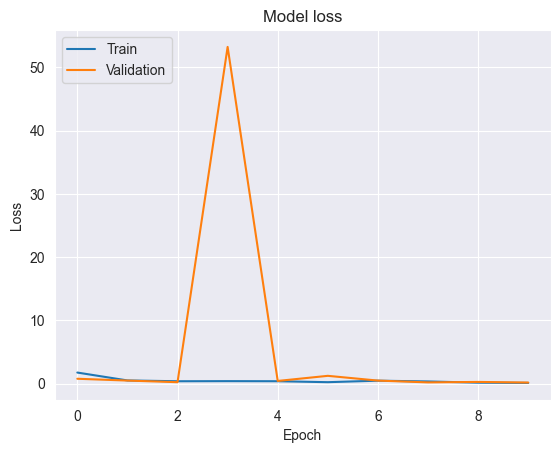

In [23]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

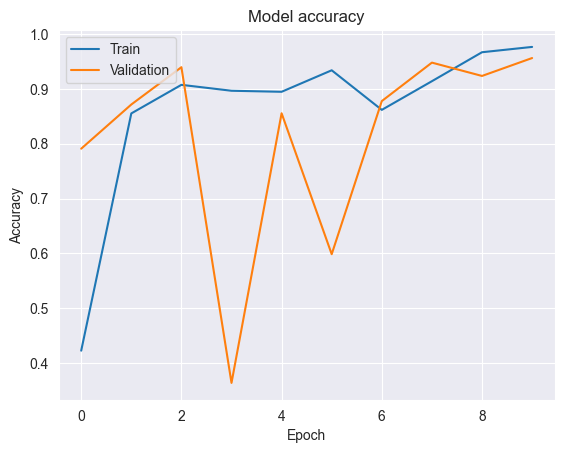

In [24]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [26]:
results = model.evaluate(images_test, labels_test)

print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

135/135 [==============================] - 10s 70ms/step - loss: 0.3466 - accuracy: 0.9144
Test Loss: 0.34662705659866333
Test Accuracy: 0.9143518805503845


In [27]:
model.save('second_custom_resnet_model.h5')

Retrieving old model.

In [14]:
from keras.models import load_model

# Load the saved model
saved_model = load_model('first_custom_resnet_model.h5')

In [15]:
results = saved_model.evaluate(images_test, labels_test)

print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

135/135 [==============================] - 11s 76ms/step - loss: 0.2550 - accuracy: 0.9389
Test Loss: 0.25502216815948486
Test Accuracy: 0.9388889074325562


## Frozen weights

In [18]:
# Image dimensions and channels
height = 32  # example height
width = 32   # example width
channels = 3  # RGB channels

input_tensor = Input(shape=(height, width, channels))

res_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Freeze the pre-trained layers
for layer in res_model.layers:
    layer.trainable = False

In [19]:
model = Sequential()
model.add(res_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 9)                 2313      
                                                                 
Total params: 24,114,569
Trainable params: 526,857
Non-trainable params: 23,587,712
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
epochs = 10
batch_size = 32

history = model.fit(images_train, labels_train, epochs=epochs, batch_size=32, validation_data=(images_valid, labels_valid))

Epoch 1/10
368/368 [==============================] - 37s 92ms/step - loss: 1.7744 - accuracy: 0.3883 - val_loss: 1.7456 - val_accuracy: 0.3451
Epoch 2/10
368/368 [==============================] - 35s 95ms/step - loss: 1.2577 - accuracy: 0.5261 - val_loss: 1.7454 - val_accuracy: 0.3979
Epoch 3/10
368/368 [==============================] - 36s 97ms/step - loss: 1.0838 - accuracy: 0.5852 - val_loss: 1.7210 - val_accuracy: 0.4090
Epoch 4/10
368/368 [==============================] - 36s 99ms/step - loss: 0.9618 - accuracy: 0.6348 - val_loss: 1.7389 - val_accuracy: 0.4194
Epoch 5/10
368/368 [==============================] - 36s 98ms/step - loss: 0.8625 - accuracy: 0.6698 - val_loss: 1.8237 - val_accuracy: 0.4153
Epoch 6/10
368/368 [==============================] - 37s 101ms/step - loss: 0.8052 - accuracy: 0.6968 - val_loss: 1.9699 - val_accuracy: 0.3799
Epoch 7/10
368/368 [==============================] - 38s 102ms/step - loss: 0.7357 - accuracy: 0.7253 - val_loss: 2.0019 - val_accurac

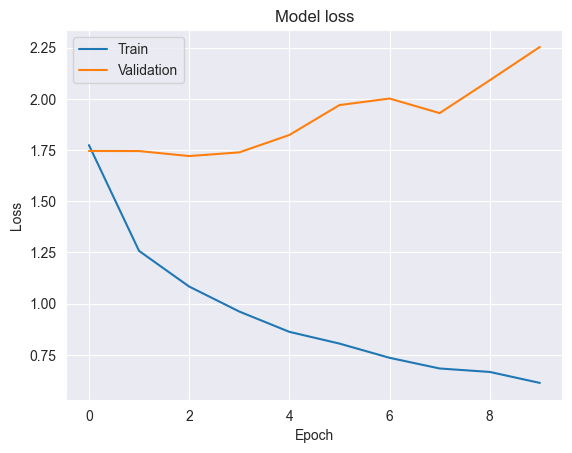

In [18]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

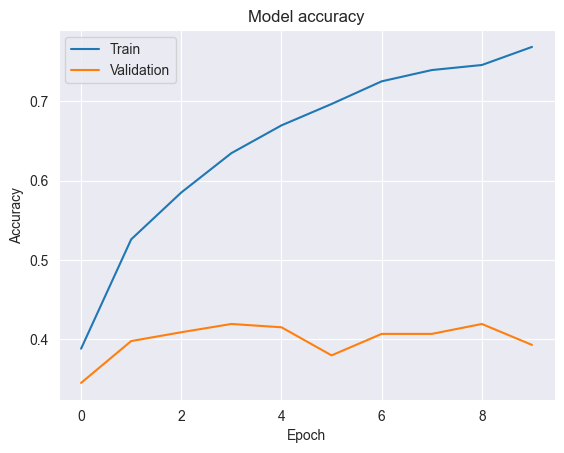

In [19]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [22]:
results = model.evaluate(images_test, labels_test)

print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

In [23]:
model.save('second_custom_resnet_model_frozen_weights.h5')

Notes: Experiment with
Early Stopping
Hyperparameters
ResNet Version
Finetuning (Unfreeze weights?)

## Examining overfitting

In [8]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',      # Metric to monitor for improvement
    patience=2,               # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)

In [9]:
# Image dimensions and channels
height = 32  # example height
width = 32   # example width
channels = 3  # RGB channels

input_tensor = Input(shape=(height, width, channels))

res_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Freeze the pre-trained layers
for layer in res_model.layers:
    layer.trainable = False

In [10]:
model = Sequential()
model.add(res_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
epochs = 10
batch_size = 32

history = model.fit(images_train, labels_train, epochs=epochs, batch_size=batch_size, validation_data=(images_valid, labels_valid), callbacks=[early_stopping])

Epoch 1/10
368/368 [==============================] - 35s 86ms/step - loss: 1.7719 - accuracy: 0.3975 - val_loss: 1.8063 - val_accuracy: 0.3632
Epoch 2/10
368/368 [==============================] - 36s 98ms/step - loss: 1.2601 - accuracy: 0.5269 - val_loss: 1.7596 - val_accuracy: 0.3562
Epoch 3/10
368/368 [==============================] - 38s 103ms/step - loss: 1.0915 - accuracy: 0.5843 - val_loss: 1.8587 - val_accuracy: 0.3792
Epoch 4/10
368/368 [==============================] - 38s 103ms/step - loss: 0.9749 - accuracy: 0.6394 - val_loss: 1.7692 - val_accuracy: 0.4118


In [17]:
results = model.evaluate(images_test, labels_test)

print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

135/135 [==============================] - 11s 79ms/step - loss: 1.8036 - accuracy: 0.3609
Test Loss: 1.8036081790924072
Test Accuracy: 0.3608796298503876
